<a href="https://colab.research.google.com/github/YerinS/Yerin_Portfolio/blob/main/DL_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DL NLP] SMS Spam Detection


- 　__Data__ 　　　　　　　5,574 SMS messages in English<br/>
- 　__Label__ 　 　　　 　　ham(legitimate), spam<br/>
- 　__Model Accuracy__　　99.28%<br/>
- 　__Data Source__ 　 　　 Kaggle (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)<br/>
- 　__DL Framework__ 　 　 Keras<br/>
- 　__Packages__ 　 　 　 　TensorFlow v2.7, Pandas, NumPy, Matplotlib<br/>
<br/>

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings("ignore")

# 1. Get Data

- Download data from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [2]:
from google.colab import files
file = files.upload()

Saving SMSSpamCollection.txt to SMSSpamCollection.txt


In [3]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', encoding='cp949', header=None)
df.info

<bound method DataFrame.info of          0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will u b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
df[0] = df[0].replace({'ham': 0, 'spam': 1})

In [5]:
data = df.to_numpy()
data

array([[0,
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       [0, 'Ok lar... Joking wif u oni...'],
       [1,
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       [0, 'Pity, * was in mood for that. So...any other suggestions?'],
       [0,
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       [0, 'Rofl. Its true to its name']], dtype=object)

# 2. Preprocess Data

In [6]:
random.shuffle(data)

- Preprocess textual data with a tokenizer

In [7]:
X = []
Y = []

for el in data:
  X.append(el[1])
  Y.append(el[0])

Y = np.asarray(Y)

tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = keras.preprocessing.sequence.pad_sequences(X, value=0, padding='post', maxlen=189)

- Split data

In [9]:
train_X = X[:int(0.8*len(X))]
train_Y = Y[:int(0.8*len(Y))]
test_X = X[int(0.8*len(X)):]
test_Y = Y[int(0.8*len(Y)):]

print("Training X Size : " + str(train_X.shape))
print("Training Y Size : " + str(train_Y.shape))
print("Test X Size : " + str(test_X.shape))
print("Test Y Size : " + str(test_Y.shape))

Training X Size : (4457, 189)
Training Y Size : (4457,)
Test X Size : (1115, 189)
Test Y Size : (1115,)


# 3. Train Model

- Create neural network model using Keras

In [10]:
model = keras.Sequential([
    keras.layers.Embedding(8983, 128),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer="adam", metrics=['accuracy'],
              loss="binary_crossentropy")

In [12]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_X, train_Y, epochs=50,
                    validation_data=(test_X, test_Y),
                    callbacks=[early_stop])

Epoch 1/50
140/140 [==============================] - 8s 10ms/step - loss: 0.4494 - accuracy: 0.8573 - val_loss: 0.3542 - val_accuracy: 0.8709
Epoch 2/50
140/140 [==============================] - 1s 5ms/step - loss: 0.3454 - accuracy: 0.8634 - val_loss: 0.2999 - val_accuracy: 0.8709
Epoch 3/50
140/140 [==============================] - 1s 5ms/step - loss: 0.2353 - accuracy: 0.8813 - val_loss: 0.1599 - val_accuracy: 0.9489
Epoch 4/50
140/140 [==============================] - 1s 5ms/step - loss: 0.1040 - accuracy: 0.9726 - val_loss: 0.0659 - val_accuracy: 0.9812
Epoch 5/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0467 - accuracy: 0.9901 - val_loss: 0.0410 - val_accuracy: 0.9901
Epoch 6/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0285 - accuracy: 0.9930 - val_loss: 0.0331 - val_accuracy: 0.9928
Epoch 7/50
140/140 [==============================] - 1s 5ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch

- Visualize model

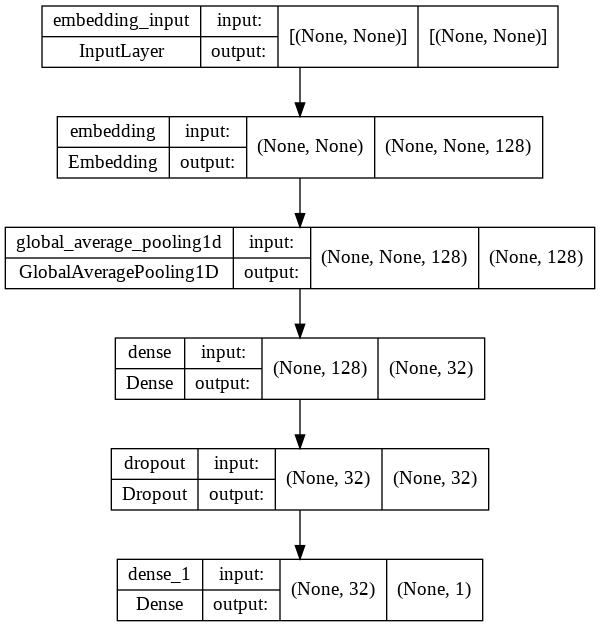

In [13]:
plot_model(model, show_shapes=True)

# 4. Evaluate Model 

- Visualize accuracy and loss history

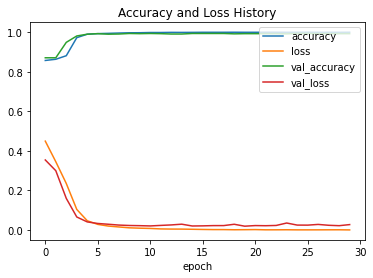

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Accuracy and Loss History')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()